# **Лабораторная работа 5. «Частотный конвертер»**

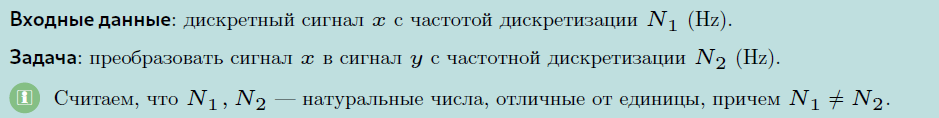

---



In [2]:
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline
import math

## Генерация сигнала

Инициализация функции отрисовки сигнала одного

In [3]:
def draw_sig(frames, name=None, figsize=(14, 3)):
    plt.figure(figsize=figsize)
    plt.plot(frames)
    if name is not None:
        plt.legend([name])
    plt.show()

Генерируем сигнал с частотой N1. Был выбран косинус, чтобы первое значение было не ноль.

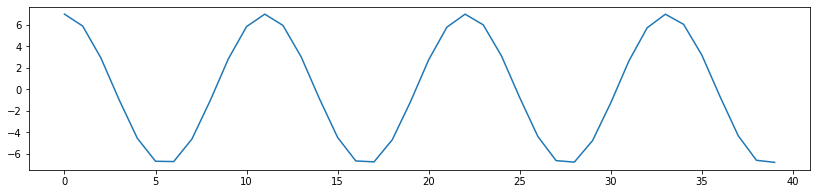

In [14]:
N1 =  22050
freq = 2000
nsamples = 40
amp = 7
signal1 = np.arange(nsamples)
signal1 = np.cos(2 * np.pi * freq * signal1 / N1)*amp
signal = signal1
draw_sig(signal)

Обозначаем частоту, на которую необходимо изменить, минимальную частоту и произведения n1 и n2

In [15]:
N2 =  16000 
n = min(N1, N2)
N =N2*N1

## Первый этап. Растяжение.

Перевод сигнала в массив и создание массива из нулей для дальнейшего создания расширенного сигала

In [16]:
x = np.asarray(signal)
X_inter = np.zeros(N2*len(x), x.dtype)

In [17]:
def inter(X,X_inter,N2):
  for j in range(X.shape[0]):
    X_inter[N2*j] = X[j]
  return X_inter

In [18]:
X_inter = inter(x, X_inter, N2)
print(X_inter)

[7. 0. 0. ... 0. 0. 0.]


In [19]:
if np.count_nonzero(X_inter) == x.shape[0]:
  print ("Тест пройден. Количество ненулевых элементов ратянутого сигнала совпадает с изначальным сигналом.")

Тест пройден. Количество ненулевых элементов ратянутого сигнала совпадает с изначальным сигналом.


## Этап 2. Фильтрация.
Отфильтруем сигнал с помощью идеального фильтра

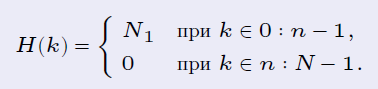

К сожалению, при использовании данного фильтра происходит очень много вычислений, что невозмоно выполнить на простом компьютере или Google Colab. Вычисление не только сбрасывало среду, но также тормозило работу компьютера вплоть до выключения. Было решено упростить фильтр до единичного. Это ухудшит качество фильтрации, однако упростит вычисления.

In [10]:
# H = np.concatenate([np.full(shape=n, fill_value=N1), np.zeros(N-n)])
# y_inter_filt = np.convolve(X_inter, H)
# y_inter_filt

In [20]:
H = np.ones(N2)
y_inter_filt = np.convolve(X_inter, H)
y_inter_filt

array([7., 7., 7., ..., 0., 0., 0.])

## Этап 3. Прореживание.

Из сигнала ̂y_inter_filt выбираем отсчеты для выходного сигнала 𝑦 с шагом 𝑁1.

In [21]:
#Этап 3
y = y_inter_filt[::N1]
y

array([ 7.        ,  5.89367159,  2.92438994, -4.55655528, -6.70353821,
       -6.73157406, -1.06794398,  2.8334834 ,  6.99928953,  5.94688266,
        3.01470285, -4.48038477, -6.67414161, -6.75824346, -1.16639785,
        2.7420017 ,  6.99715828,  5.99888657,  3.10440381, -4.40330478,
       -6.64339023, -6.783541  , -1.26461495,  2.64996339,  6.99360667,
        6.04967276,  3.1934746 , -4.32533096, -6.6112903 , -6.80746155])



---



---



## Визуализация

При увеличении частоты дискретизации

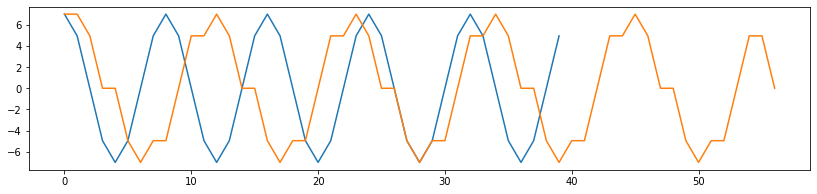

In [13]:
plt.figure(figsize=(14, 3))
plt.plot(x)
plt.plot(y)
plt.show()

При уменьшении частоты дискретизации

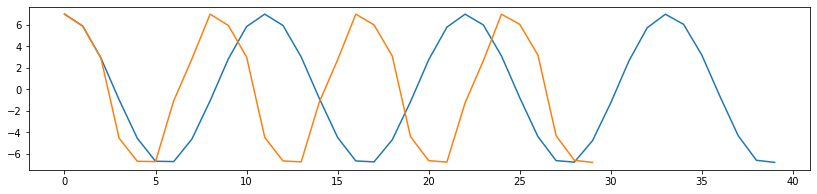

In [22]:
plt.figure(figsize=(14, 3))
plt.plot(x)
plt.plot(y)
plt.show()